# Personal injury in traffic accidents report

- Chenchen Feng

## Project Goals

* The goal is to find the key drivers of personal injury in Montgomery county traffic accidents. Make recommendations to identify the help the data science team have a better prediction on the future house value.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

Data source:
https://data.montgomerycountymd.gov/Public-Safety/Traffic-Violations/4mse-ku6q
* Data period: 2012-01-01 to 2022-08-15

## Data Dictionary

* Date Of Stop: Date of the traffic violation.
* Time Of Stop: Time of the traffic violation.
* SubAgency: Court code representing the district of assignment of the officer. 
* Belts: YES if seat belts were in use in accident cases.
* Personal Injury: Yes if traffic violation involved Personal Injury.
* Property Damage: Yes if traffic violation involved Property Damage.
* Alcohol: Yes if the traffic violation included an alcohol related suspension.
* Violation Type: Violation type. (Examples: Warning, Citation, SERO)
* Contributed To Accident: If the traffic violation was a contributing factor in an accident.
* Race: Race of the driver. (Example: Asian, Black, White, Other, etc.)
* Gender: Gender of the driver (F = Female, M = Male)

## Initial Questions

1. 

## Wrangle Zillow Data
To acquire the Montgomery county traffic violation data, I did the following two steps:
1. Download the CSV file from https://data.montgomerycountymd.gov/Public-Safety/Traffic-Violations/4mse-ku6q.
2. Import CSV file to jupyter notebook.
* Data period: 2012-01-01 to 2022-08-15, if you want to download the data and run the notebook, be aware the date.

In [2]:
import acquire
df = acquire.acquire_data()

To clean the data, I did flowing steps:
1. drop columns
2. check null value
3. convert time format
4. set the time to index and create new columns for year, month, day of the week and hour
5. convert the boolean value into int: Contributed to accident
6. drop rows: SubAgency S15 only has 3 rows and W15 only have 7 rows.
7. get all the data related to accident.

In [3]:
import prepare
df = prepare.clean_data(df)

Split the data into train 56%, validate 24%, test 20%.
* Our data is now split into 3 samples so that we can use the train sample to explore, fit to models and evaluate without looking at new data.
* The validate is used to verify that our models built are not overfit to the train dataset and get the best model.
* The test set is used to give an estimate of how this model will perform on data is has never seen in the future.

In [4]:
train, validate, test = prepare.split_data(df)
train.shape, validate.shape, test.shape

((26922, 13), (11538, 13), (9616, 13))

## Data Context

There are 48,076 accident related in Montgomery county, Maryland traffic violation records. 

Data time range is from 2012-01-01 to 2022-08-15. 

<AxesSubplot:xlabel='year', ylabel='Count'>

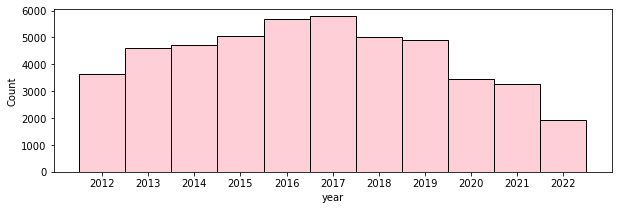

In [26]:
# hist plot for total accidents count from 2012-01-01 to 2022-08-15
plt.rcParams["figure.figsize"] = (10,3)
sns.histplot(df.year.sort_index(ascending=True), color = 'pink')

<AxesSubplot:xlabel='day_of_week', ylabel='Count'>

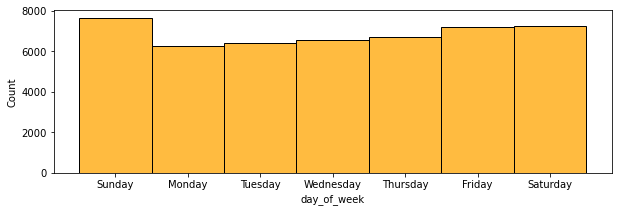

In [30]:
# accidents number by the day of week
plt.rcParams["figure.figsize"] = (10,3)
sns.histplot(df.day_of_week.sort_index(ascending=True), color = 'orange')

## Explore

#### 1.  Does personal injury in accident related to the hour? day of week? month? year?

<AxesSubplot:ylabel='year'>

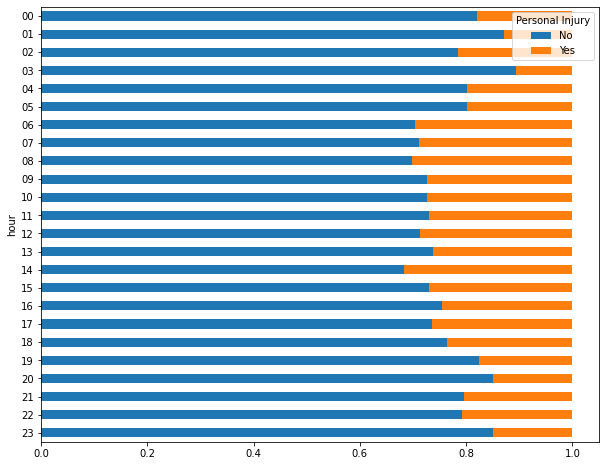

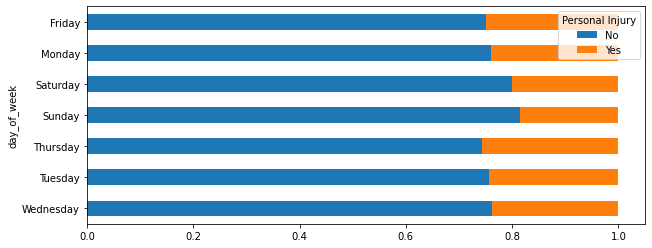

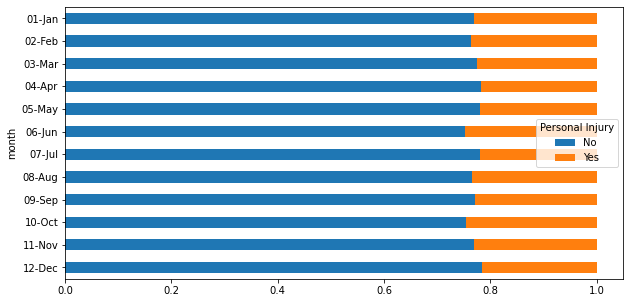

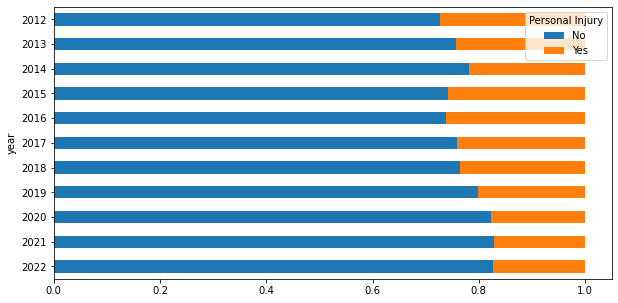

In [22]:
# create hour, day of week, month and year crosstab tables
hour = pd.crosstab(train.hour, train['Personal Injury'], normalize = 'index').sort_index(ascending=False)
day_of_week = pd.crosstab(train.day_of_week, train['Personal Injury'], normalize = 'index').sort_index(ascending=False)
month = pd.crosstab(train.month, train['Personal Injury'], normalize = 'index').sort_index(ascending=False)
year = pd.crosstab(train.year, train['Personal Injury'], normalize = 'index').sort_index(ascending=False)

# plot chart for each table
hour.plot.barh(stacked = True, figsize = (10, 8), fontsize = 10)
day_of_week.plot.barh(stacked = True, figsize = (10, 4), fontsize = 10)
month.plot.barh(stacked = True, figsize = (10, 5), fontsize = 10)
year.plot.barh(stacked = True, figsize = (10, 5), fontsize = 10)

* Hour: most personal injury accidents happen during the day time, from 06:00 - 18:00.
* Day of week: weekends seems has less perosonal injury accidents even weekends have more accidents number.
* Month: June and Octobr have the hightest personal injury rate in accidents.
* Year: 2020-2022 have the lowest rate because COVID started from the beginning of 2020 and accidents number reduced a lot due to COVID.

#### 2. Does the personal injury in accident rate related to race and gender?

<AxesSubplot:xlabel='Gender', ylabel='Count'>

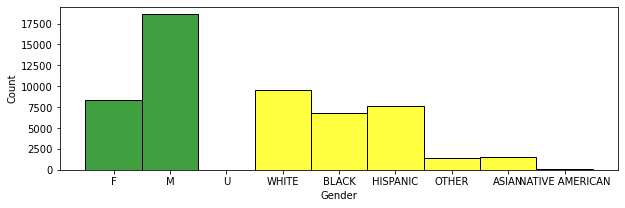

In [35]:
# gender and race count for accident
plt.rcParams["figure.figsize"] = (10,3)
sns.histplot(train.Gender, color = 'green')
sns.histplot(train.Race, color = 'yellow')

<AxesSubplot:ylabel='Race'>

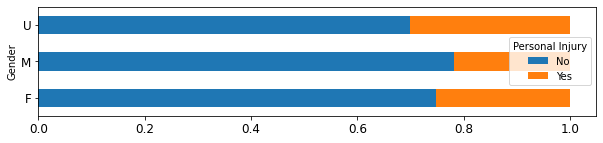

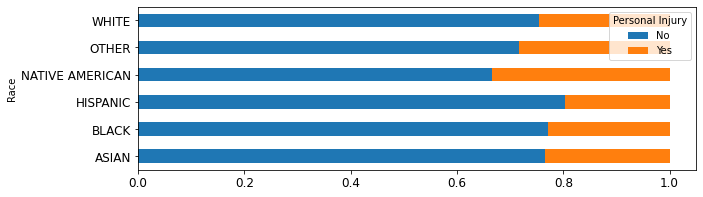

In [32]:
race = pd.crosstab(train.Race, train['Personal Injury'], normalize = 'index')
gender = pd.crosstab(train.Gender, train['Personal Injury'], normalize = 'index')

gender.plot.barh(stacked = True, figsize = (10, 2), fontsize = 12)
race.plot.barh(stacked = True, figsize = (10, 3), fontsize = 12)

* gender: males number is more than double of the female number, but the female's rate is higher than males.
* race: according to the race count and persoonal injury rate in accident, white people is the highest one.

#### 3. What about the relationship between personal injury and Violation Type? achohol?

<AxesSubplot:ylabel='Alcohol'>

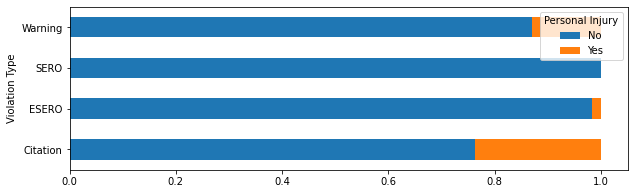

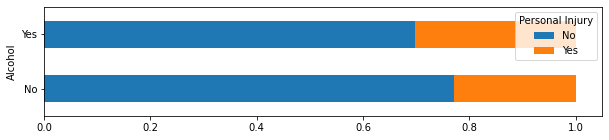

In [40]:
violation = pd.crosstab(train['Violation Type'], train['Personal Injury'], normalize = 'index')
alcohol = pd.crosstab(train.Alcohol, train['Personal Injury'], normalize = 'index')

violation.plot.barh(stacked = True, figsize = (10, 3), fontsize = 10)
alcohol.plot.barh(stacked = True, figsize = (10, 2), fontsize = 10)

* Violation Type: Citation and warning are the highest two, it might because citation has the highest accident counts.
* Alcohol: alcohol related accident has more chance to cause personal injury.

#### 4. Does persoonal injury in accident has relationship with agency location?

<AxesSubplot:ylabel='SubAgency'>

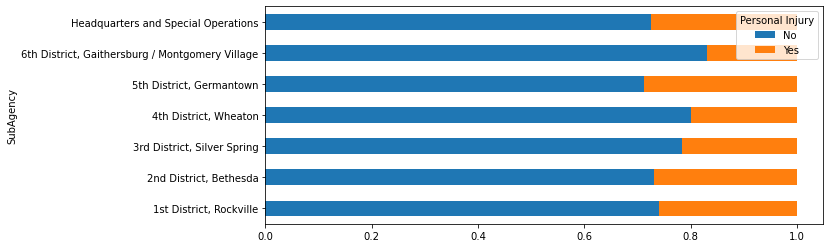

In [41]:
agency = pd.crosstab(train['SubAgency'], train['Personal Injury'], normalize = 'index')
agency.plot.barh(stacked = True, figsize = (10, 4), fontsize = 10)

* different locations has different rate, germantown is the highest one.

#### 5. Is property damage has relationship with personal injury?

<AxesSubplot:xlabel='Property Damage', ylabel='Count'>

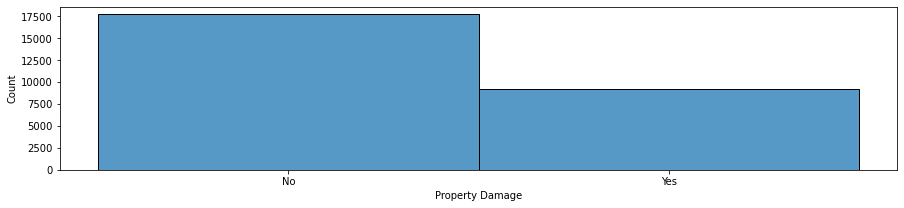

In [46]:
sns.histplot(train['Property Damage'].sort_index(ascending=True))

<AxesSubplot:ylabel='Property Damage'>

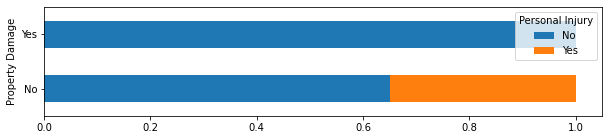

In [47]:
damage = pd.crosstab(train['Property Damage'], train['Personal Injury'], normalize = 'index')
damage.plot.barh(stacked = True, figsize = (10, 2), fontsize = 10)

* it seems property damage and personal injury has no relationship.

## Summary

Race, gender, alcohol, agency location and all the time features all have relationship with personal injury in traffic accidents. Also violation type is related to our target variable. Since violation type is an outcome of traffic violation, personal injury is also an outcome. I prefer to not use an outcome to predic another outcome.
* Feature will be used for feature engineering will be:

    Alcohol, race, gender, subagency, hour, day of week, month

## Feature Engineering

In [48]:
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector

# split the train first
x_train_feature = train[['Alcohol', 'Race','day_of_week', 'hour','Gender','SubAgency','month']]
y_train_feature = train[['Personal Injury']]

# get dummy variables 
x_train_dummy_feature = pd.get_dummies(x_train_feature)
y_train_dummy_feature = pd.get_dummies(y_train_feature, drop_first=True)

In [49]:
# use select k best method to select top 10 attributes
kbest = SelectKBest(f_regression, k=10)
kbest.fit(x_train_dummy_feature, y_train_dummy_feature)
x_train_dummy_feature.columns[kbest.get_support()]

Index(['Race_HISPANIC', 'day_of_week_Sunday', 'hour_01', 'hour_03', 'hour_14',
       'hour_23', 'SubAgency_2nd District, Bethesda',
       'SubAgency_4th District, Wheaton', 'SubAgency_5th District, Germantown',
       'SubAgency_6th District, Gaithersburg / Montgomery Village'],
      dtype='object')

* select k best: race, day of week, hour, subagency

In [51]:
# use RFE method to select top 10 attributes
from sklearn.linear_model import LinearRegression
model = LinearRegression()
rfe = RFE(model, n_features_to_select=10)
rfe.fit(x_train_dummy_feature, y_train_dummy_feature)
x_train_dummy_feature.columns[rfe.get_support()]

Index(['month_01-Jan', 'month_02-Feb', 'month_03-Mar', 'month_04-Apr',
       'month_05-May', 'month_07-Jul', 'month_08-Aug', 'month_09-Sep',
       'month_11-Nov', 'month_12-Dec'],
      dtype='object')

* RFE: month